In [1]:
import sys
import os
import pandas as pd
import numpy as np 
import folium   
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

sys.path.append(os.path.abspath('..')) 

from utils.preproc_utils import *
from utils.eda_utils import *

%load_ext autoreload
%autoreload 2

## **Data Import and Cleaning**

In [7]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/raw'))

basket_path = os.path.join(base_dir, 'customer_basket.csv')
customer_info_path = os.path.join(base_dir, 'customer_info.csv')
product_path = os.path.join(base_dir, 'product_mapping.xlsx')

basket = pd.read_csv(basket_path, index_col='invoice_id')
customer_info = pd.read_csv(customer_info_path, index_col='customer_id')
product = pd.read_excel(product_path)

In [8]:
customer_info_clean = clean_customer_data(customer_info)

#customer_info_clean['city'] = customer_info_clean.apply(lambda row: assign_city(row['latitude'], row['longitude']), axis=1)
#customer_info_clean.drop(['latitude', 'longitude'], axis=1, inplace=True)

,kids_home,teens_home,number_complaints,distinct_stores_visited,spend_groceries,spend_electronics,typical_hour,spend_vegetables,spend_nonalcohol_drinks,spend_alcohol_drinks,...,spend_alcohol_drinks_proportion,spend_meat_proportion,spend_fish_proportion,spend_hygiene_proportion,spend_videogames_proportion,age,loyalty_member,years_as_customer,educ_years,gender_binary
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,484.0,604.0,943.0,...,0.023667,0.055866,0.101794,0.054561,0.099034,60,0,14.0,12,1
43460,1.0,0.0,1.0,2.0,5015.0,1334.0,8.0,344.0,374.0,1217.0,...,0.084397,0.074064,0.133495,0.146671,0.071290,36,0,10.0,12,0


In [12]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43631 entries, 39634 to 5120
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   kids_home                                43107 non-null  float64
 1   teens_home                               42610 non-null  float64
 2   number_complaints                        42977 non-null  float64
 3   distinct_stores_visited                  42322 non-null  float64
 4   spend_groceries                          43631 non-null  float64
 5   spend_electronics                        43631 non-null  float64
 6   typical_hour                             41886 non-null  float64
 7   spend_vegetables                         42758 non-null  float64
 8   spend_nonalcohol_drinks                  43631 non-null  float64
 9   spend_alcohol_drinks                     43631 non-null  float64
 10  spend_meat                               43

## **Distribution Analysis**

### **Continuous Variables**

In [17]:
# note: 'total_distinct_products' is being treated as a continuous variable
customer_info_cont = ['spend_groceries', 'spend_electronics', 'spend_vegetables', 'spend_nonalcohol_drinks', 'spend_alcohol_drinks',
                      'spend_meat', 'spend_fish', 'spend_hygiene', 'spend_videogames', 'spend_petfood', 'percentage_of_products_bought_promotion', 'total_distinct_products']

customer_info_disc = ['kids_home', 'teens_home', 'number_complaints', 'distinct_stores_visited', 'typical_hour', 'age', 'years_as_customer', 'educ_years']

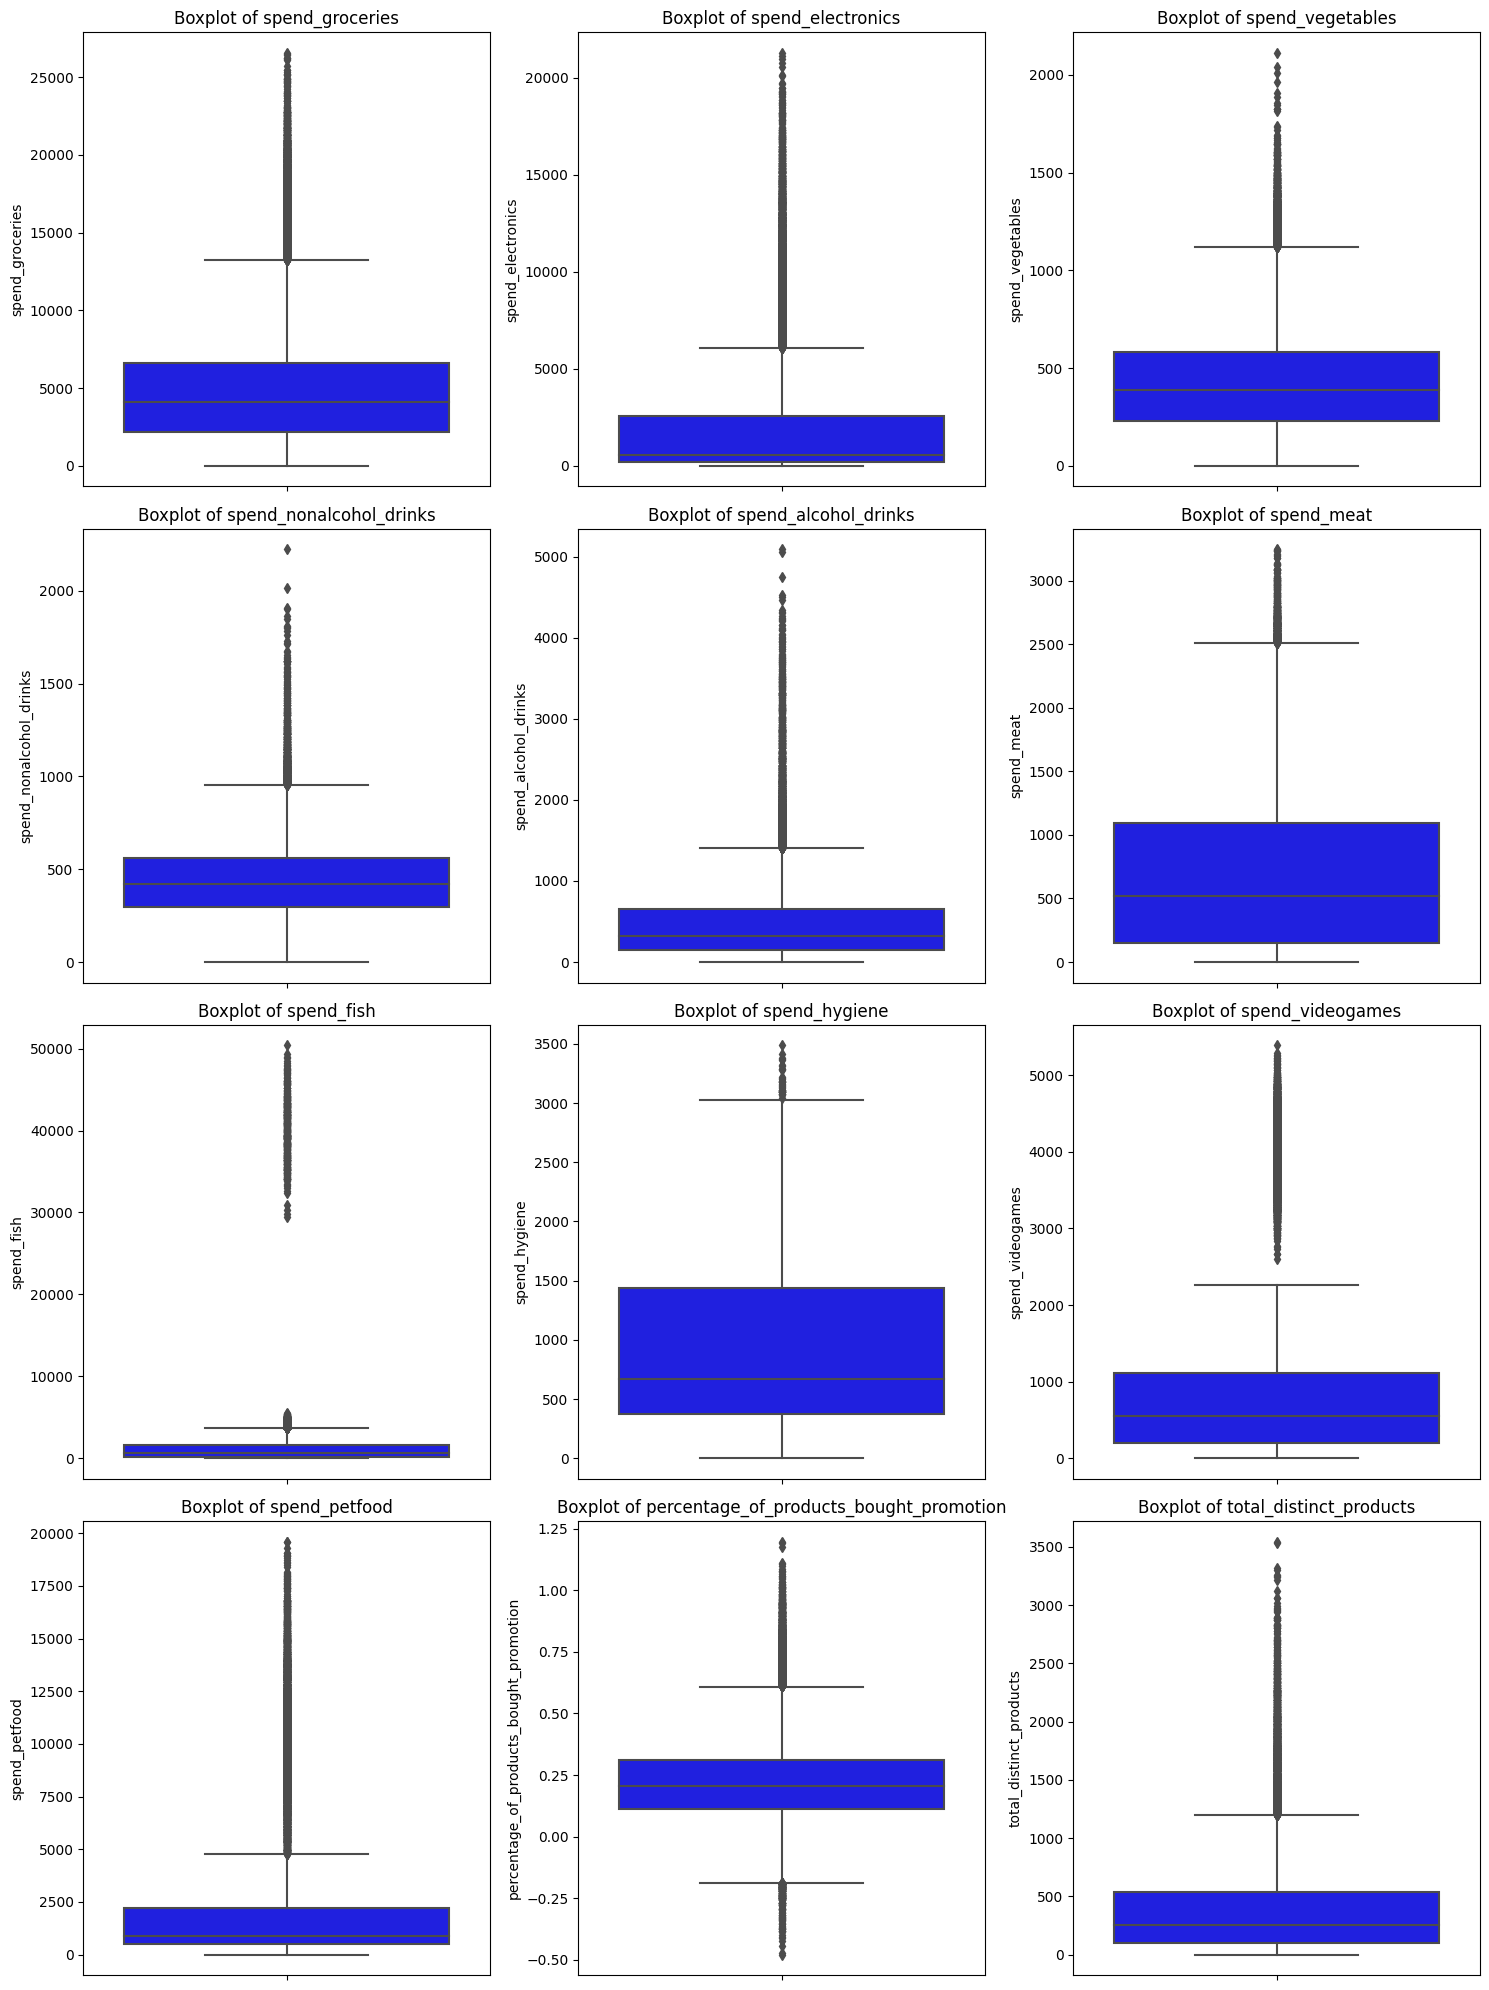

In [6]:
boxplotter(customer_info_clean, customer_info_cont)

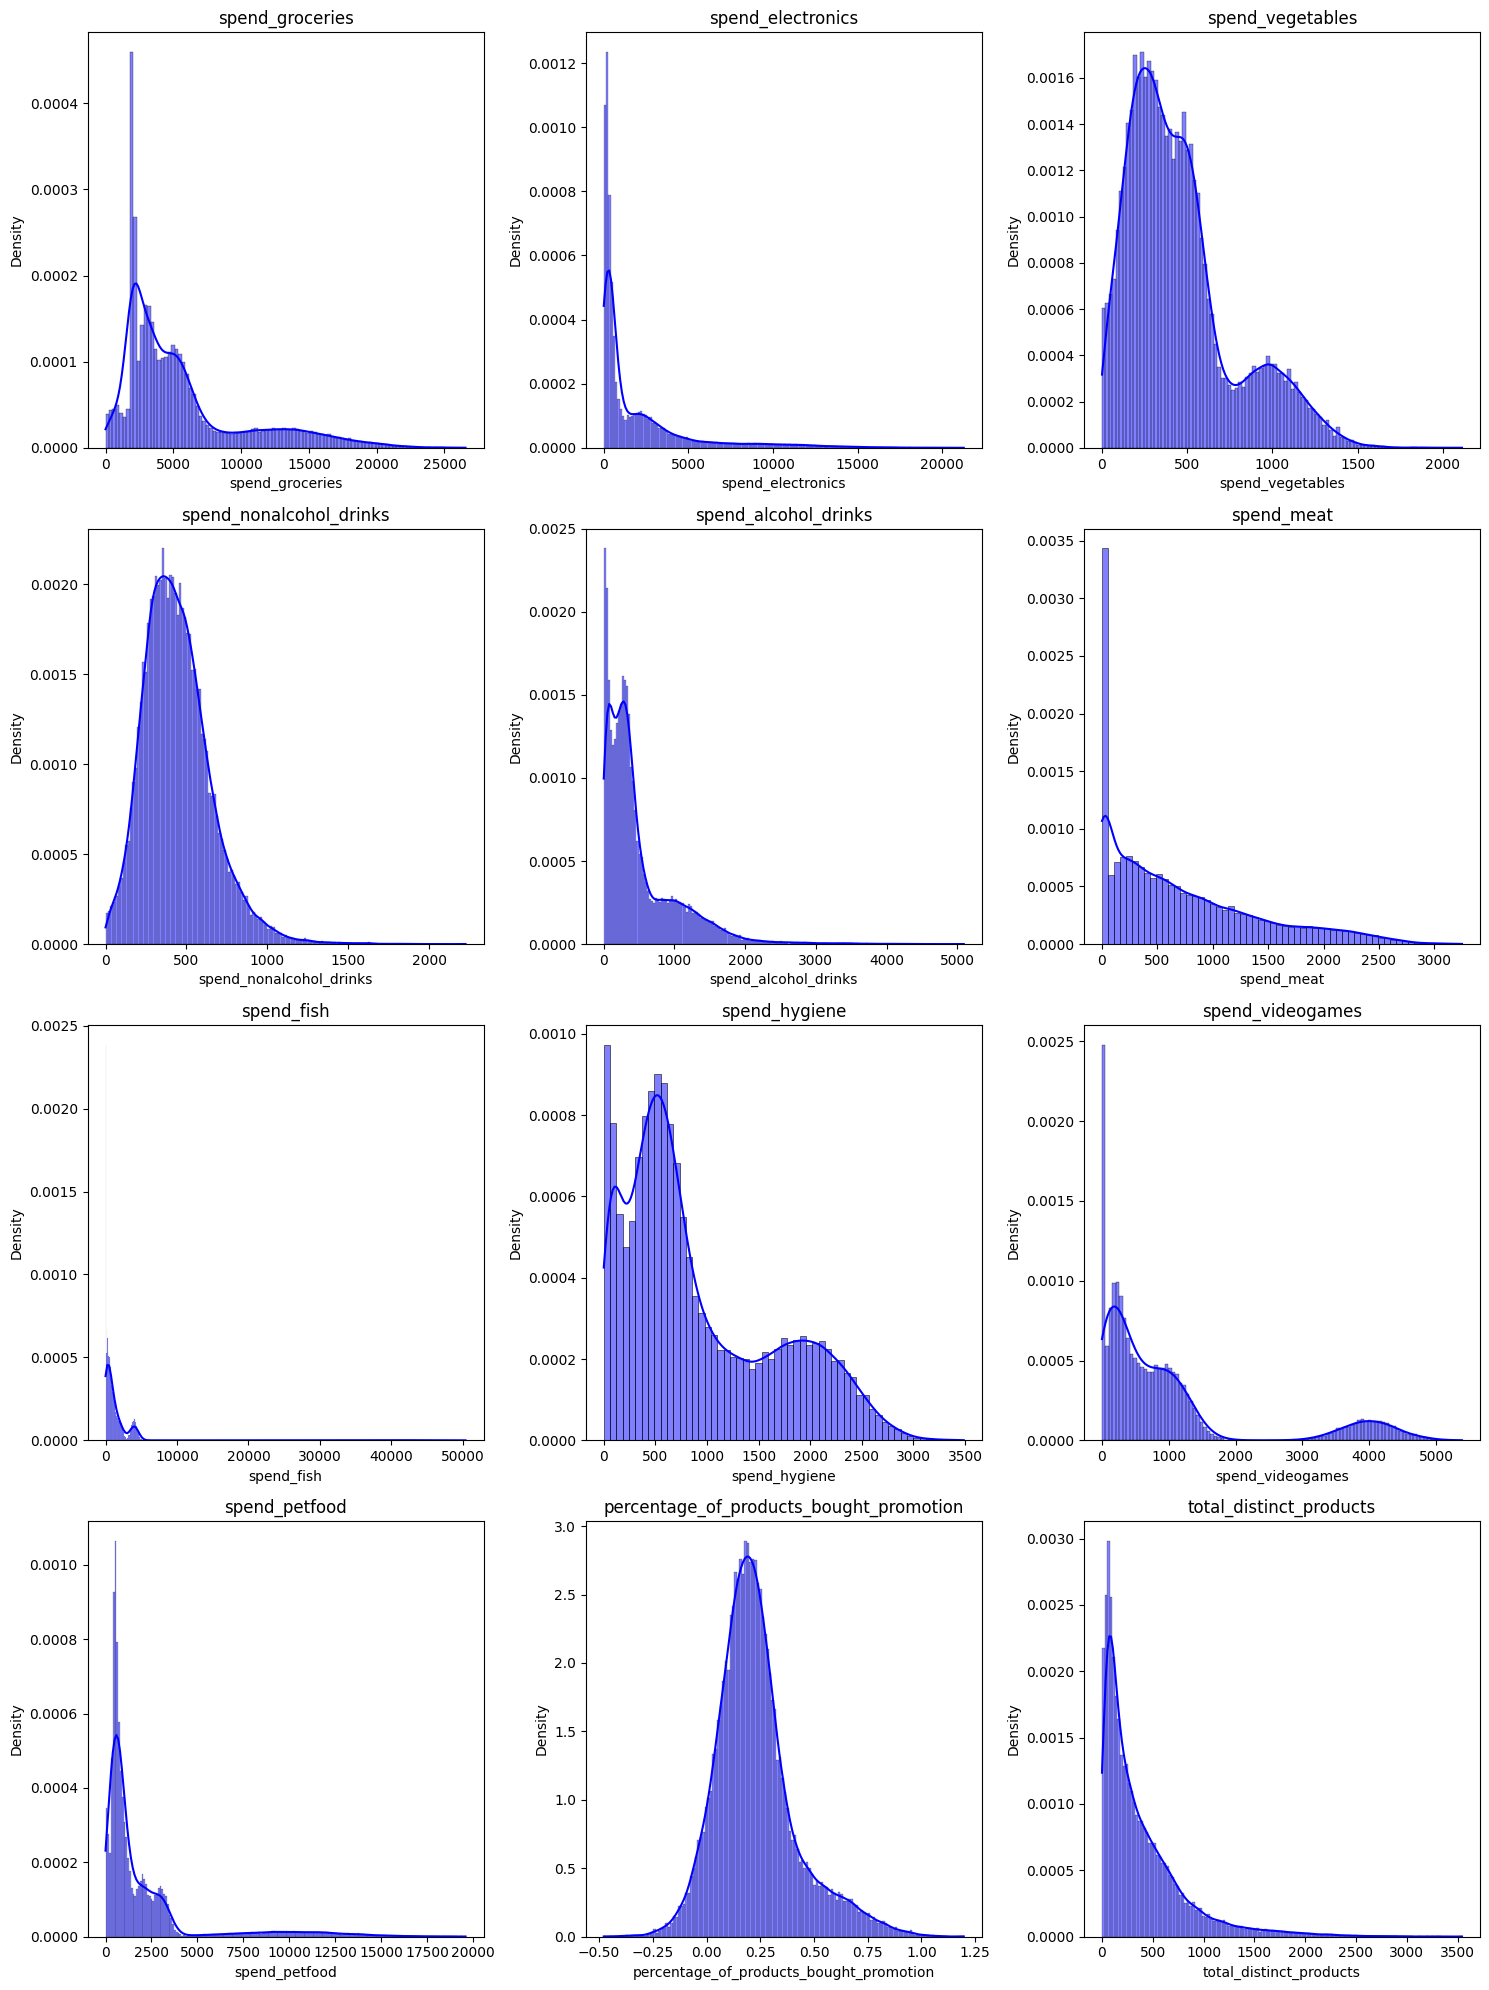

In [7]:
var_plotter(customer_info_clean, customer_info_cont)

In [8]:
threshold = {'spend_videogames' : (1,2200),
          'spend_fish' : (1, 3000),
          'spend_meat' : (3,3000),
          'spend_electronics' : (0, 8000),
          'spend_petfood' : (0, 4200),
          }

a, b = remove_outliers_manual(customer_info_clean, threshold)

Number of rows removed: 18134
Percentage of dataset removed: 41.56%


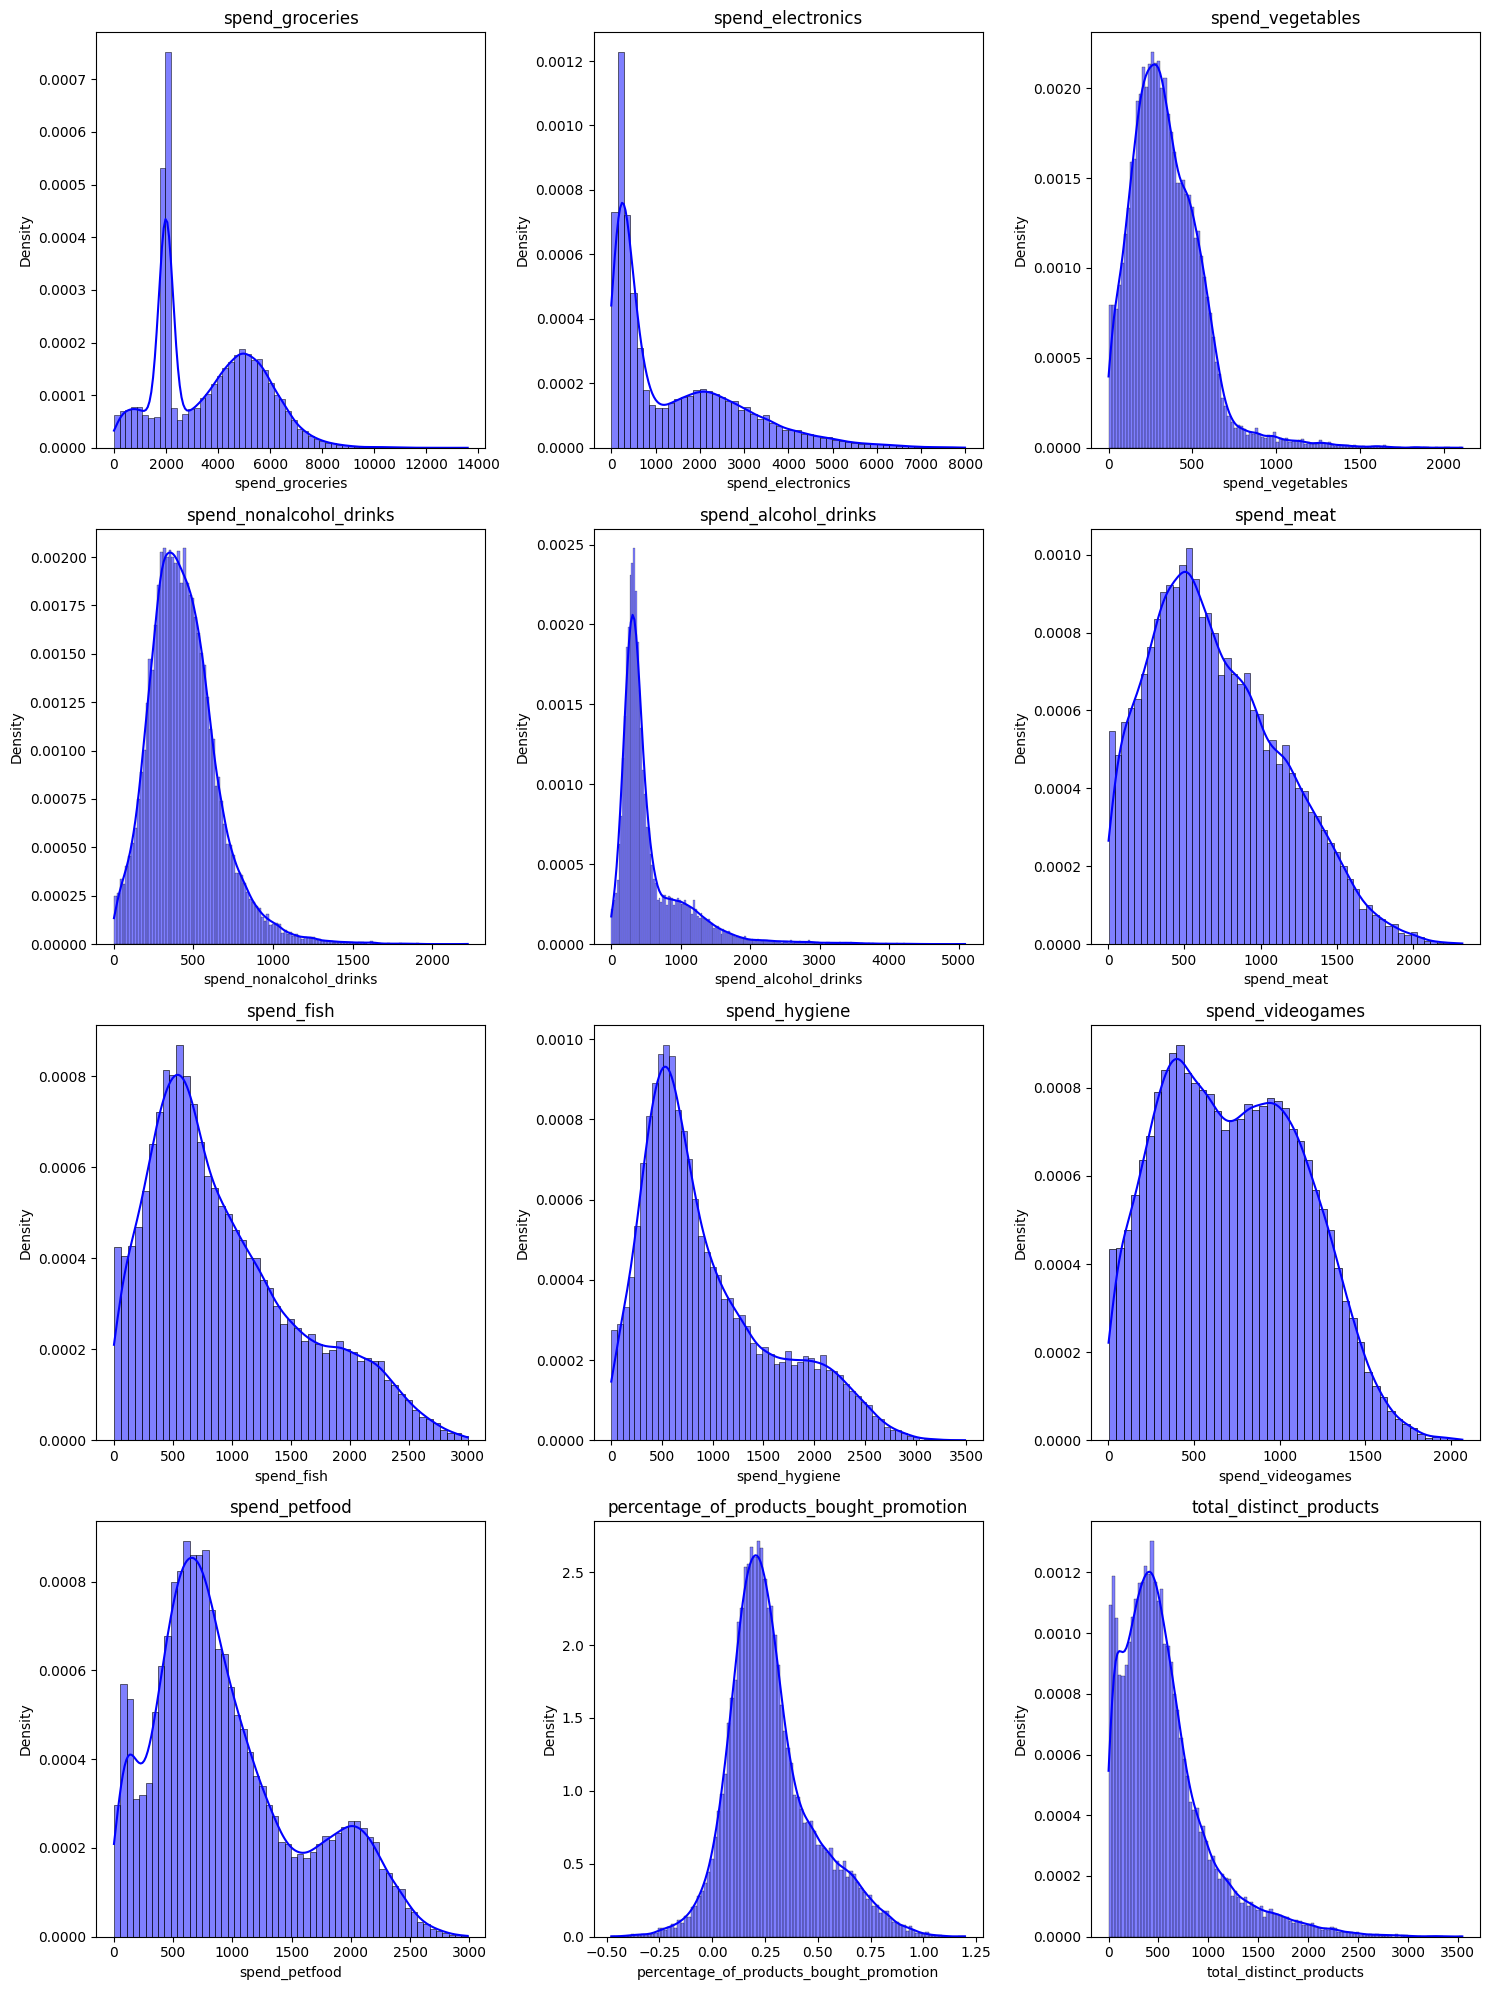

In [9]:
var_plotter(a, customer_info_cont)

In [10]:
clean, outliers = outlier_removal_unidimensional(customer_info_clean)

Number of rows removed: 18134
Percentage of dataset removed: 41.56%
Number of rows removed: 9965
Percentage of dataset removed: 22.84%
Column 'percentage_of_products_bought_promotion' was shifted by 0.121251261321175 to handle negative values.
Column 'percentage_of_products_bought_promotion' was shifted by 0.4779855680623625 to handle negative values.


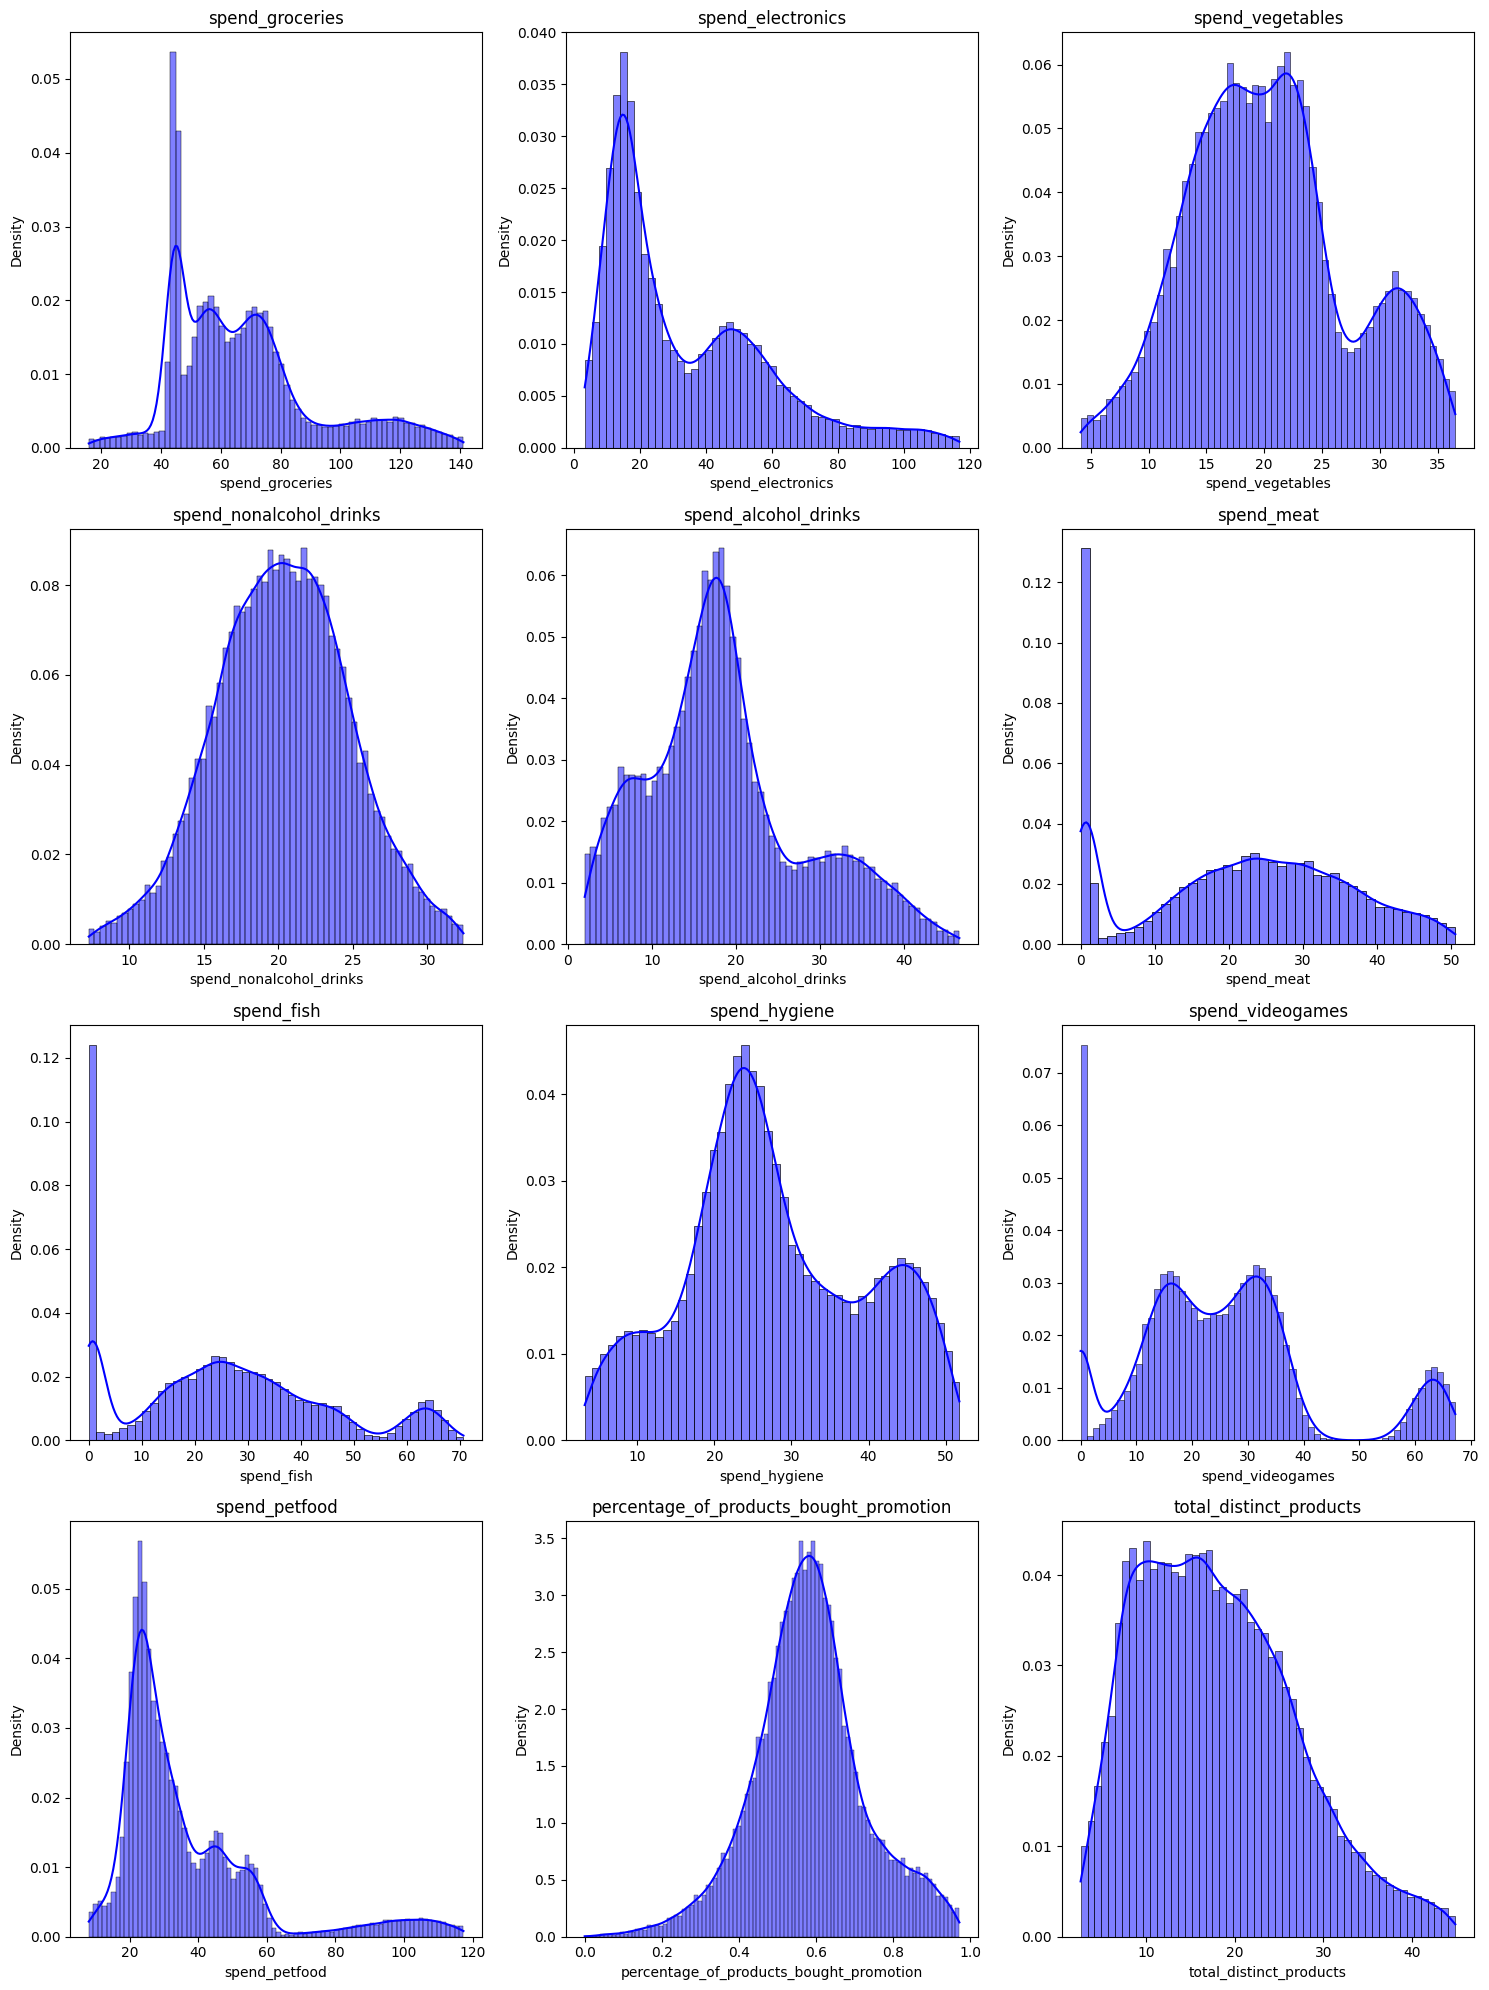

In [11]:
var_plotter(clean, customer_info_cont)

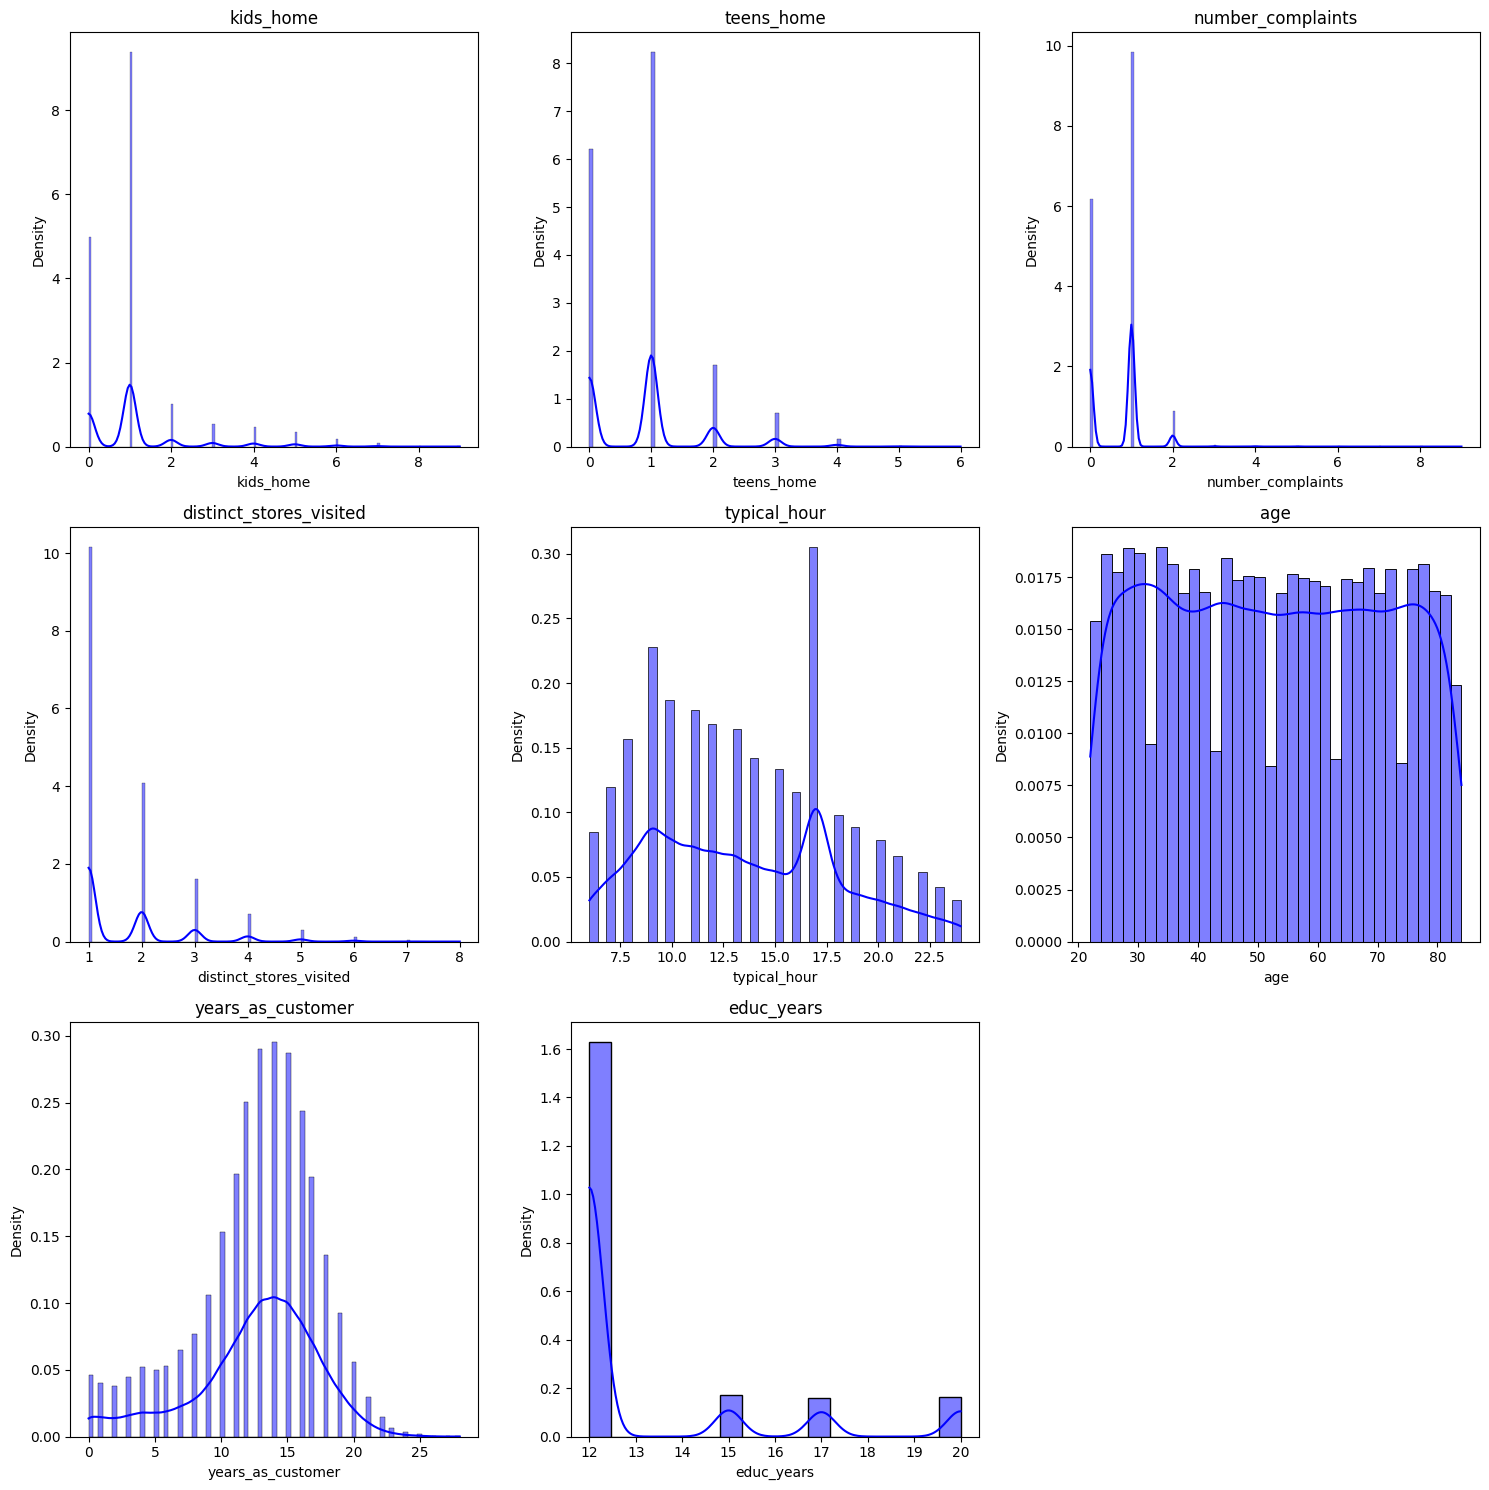

In [18]:
var_plotter(customer_info_clean, customer_info_disc)

### **Categorical Variables**

In [12]:
# city and gender

## **Correlation Analysis**

## **Missing Values and Inconsistency Checking**

In [ ]:
basket.isna().sum()

list_of_goods    0
customer_id      0
dtype: int64

In [ ]:
product.isna().sum()

product_name    0
category        0
dtype: int64

In [ ]:
customer_info_clean.isna().sum()

kids_home                                   524
teens_home                                 1021
number_complaints                           654
distinct_stores_visited                    1309
spend_groceries                               0
spend_electronics                             0
typical_hour                               1745
spend_vegetables                            873
spend_nonalcohol_drinks                       0
spend_alcohol_drinks                          0
spend_meat                                    0
spend_fish                                 1309
spend_hygiene                                 0
spend_videogames                              0
spend_petfood                                 0
total_distinct_products                       0
percentage_of_products_bought_promotion       0
age                                           0
loyalty_member                                0
years_as_customer                             0
educ_years                              

In [ ]:
missing_percentage_per_column = round(((customer_info_clean.isnull().sum() / len(customer_info_clean)) * 100), 2)

columns_with_missing_values = missing_percentage_per_column[missing_percentage_per_column > 0]

total_missing_percentage = (customer_info_clean.isnull().sum().sum() / (customer_info_clean.shape[0] * customer_info_clean.shape[1])) * 100

print("Percentage of missing values in each column with missing data:")
print(columns_with_missing_values)
print("\nPercentage of missing values in the entire DataFrame:", round(total_missing_percentage, 2))

Percentage of missing values in each column with missing data:
kids_home                  1.20
teens_home                 2.34
number_complaints          1.50
distinct_stores_visited    3.00
typical_hour               4.00
spend_vegetables           2.00
spend_fish                 3.00
dtype: float64

Percentage of missing values in the entire DataFrame: 0.74


### **Inconsistency Checking**


In [ ]:
datasets = {
    "basket": basket,
    "customer_info_refactored": customer_info_clean,
    "product": product
}

for name, dataset in datasets.items():
    print(f"Number of duplicates removed from the {name} dataset: {dataset.duplicated().sum()}")
    dataset.drop_duplicates(inplace=True)


Number of duplicates removed from the basket dataset: 0
Number of duplicates removed from the customer_info_refactored dataset: 0
Number of duplicates removed from the product dataset: 1


In [14]:
test = pd.read_csv('latent_representation_test.csv', index_col='customer_id')
test.head(2)

,latent_0,latent_1,latent_2,latent_3,latent_4
customer_id,,,,,
39634,1.309221,4.825352,6.254928,2.923136,2.577851
43460,0.492162,2.837453,3.794220,2.401093,3.787700


In [15]:
from sklearn.cluster import KMeans

n_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
test['cluster'] = kmeans.fit_predict(test)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


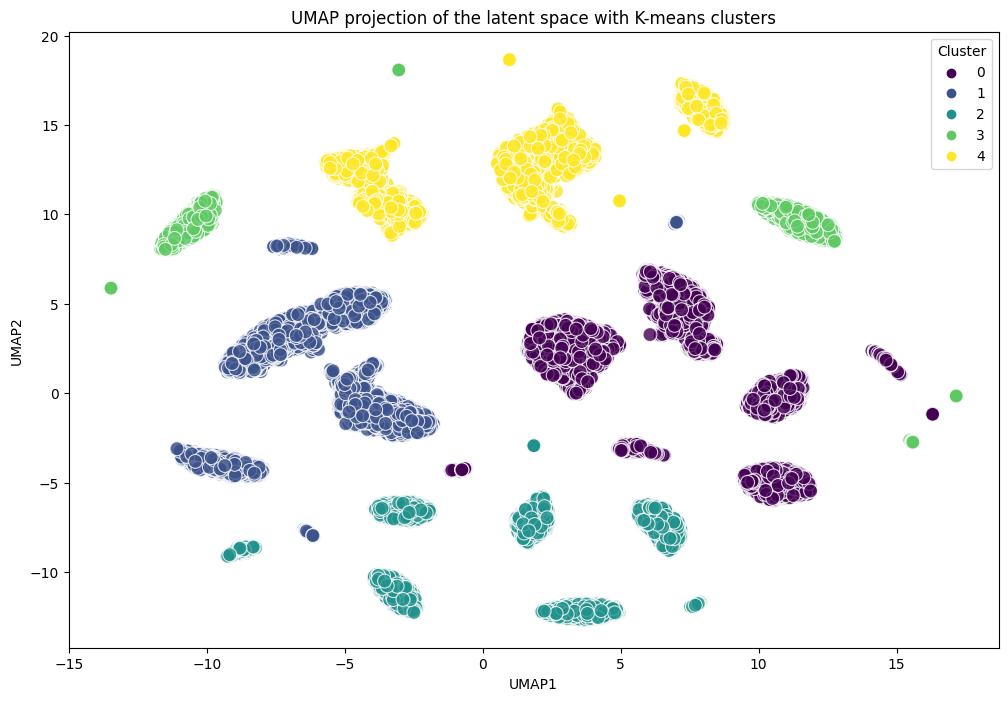

In [19]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(test)

# Create a DataFrame for the embedding
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=test.index)
embedding_df['cluster'] = test['cluster']

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='cluster', data=embedding_df, palette='viridis', s=100, alpha=0.8)
plt.title('UMAP projection of the latent space with K-means clusters')
plt.legend(title='Cluster')
plt.show()

In [21]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/processed'))
customer_info_path = os.path.join(base_dir, 'customer_info_test.csv')
test2 = pd.read_csv(customer_info_path, index_col='customer_id')

test2.head(2)

,spend_groceries,spend_electronics,spend_vegetables,spend_nonalcohol_drinks,spend_alcohol_drinks,spend_meat,spend_fish,spend_hygiene,spend_videogames,spend_petfood,percentage_of_products_bought_promotion,total_distinct_products,loyalty_member,gender_binary
customer_id,,,,,,,,,,,,,,
39634,0.830325,0.577961,0.478714,0.521136,0.430382,0.827601,0.283737,0.789594,0.855706,0.358178,0.573152,0.095023,0.0,1.0
43460,0.434597,0.250417,0.403582,0.410080,0.488927,0.573250,0.195471,0.778806,0.436760,0.318431,0.639158,0.850906,0.0,0.0


In [22]:
n_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
test2['cluster'] = kmeans.fit_predict(test2)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


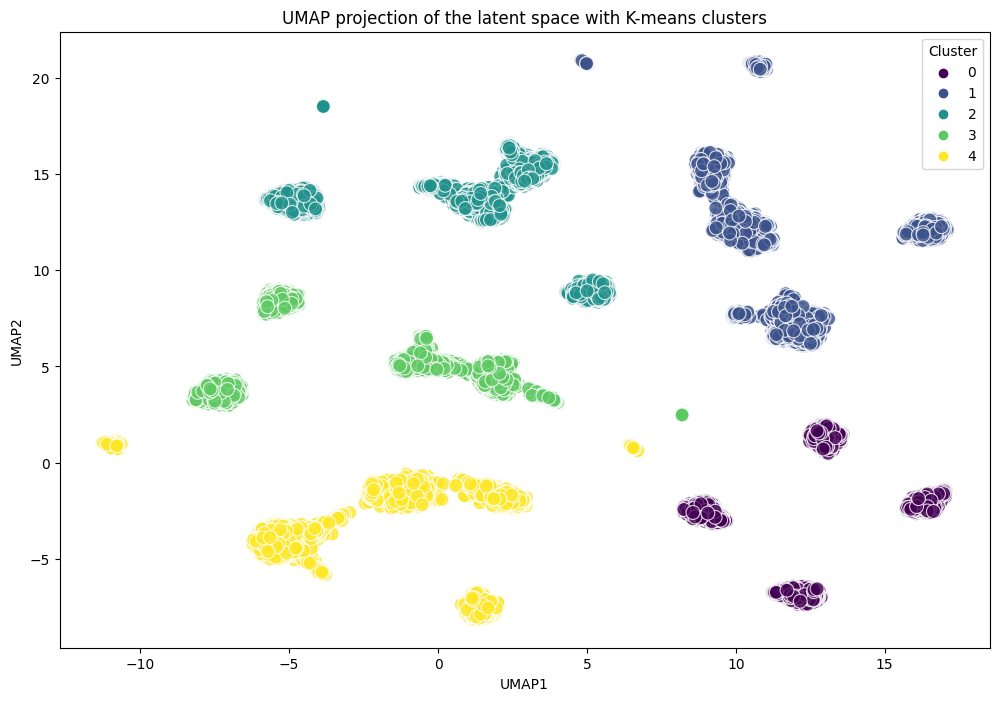

In [23]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(test2)

# Create a DataFrame for the embedding
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=test2.index)
embedding_df['cluster'] = test2['cluster']

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='cluster', data=embedding_df, palette='viridis', s=100, alpha=0.8)
plt.title('UMAP projection of the latent space with K-means clusters')
plt.legend(title='Cluster')
plt.show()